<a href="https://colab.research.google.com/github/LamuneGitHub/A001_Python_Test/blob/main/pandas_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [3]:
# import

%matplotlib inline

from IPython.display import display

import re
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#pandas에서 DataFrame을 요약해서 표시하지 않도록 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 줄 구분 표시 출력 
def print_line() :
  print ("\n------------------------------------------------")
def print_line_m() :
  print ("\n-----------------------")
def print_line_s() :
  print ("\n----------")

"""
# 구글 드라이브 mount
from google.colab import drive
drive.mount('/content/drive')
"""

"\n# 구글 드라이브 mount\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

# 데이터 파일 로딩

In [4]:
# 엑셀 파일 로딩
# df_excel_01 = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx", sheet_name = "008770 ")

# # CSV 파일 로딩
# df_vgames = pd.read_csv( "https://raw.githubusercontent.com/LamuneGitHub/AI15_Prj_01/main/vgames2.csv" , sep=","  , header=0  , index_col=0 ) 

# 시본 예제 파일
df_titanic = sns.load_dataset("titanic")

df_tmp = df_titanic

# 조회

In [ ]:
# 간단 조건 조회 [] casee 01
df_patients[df_patients.몸무게 == 22.14] 

# 간단 조건 조회 loc() case 02
df_patients.loc[ df_patients.몸무게 == 22.14]

# 간단 조회 query case 03
df_patients.query( "몸무게 == 22.14" )

#: 나이가 없는 사람들 정보 condition 사용
condition = df_titanic['age'].isnull()
df_check = df_titanic.loc[condition]
df_check.head(3)


#------------------------------------------

# 다중 조건 조회 : condition 조건 사용 
cond_1 = df_titanic['age'].isnull()
cond_2 = df_titanic['age'].isnull()
df_check = df_titanic.loc[cond_1 & cond_2]
df_check.head(3)

# Query 를 사용한 조회 : 사망자 , 남성 case 01 
df_temp = df_titanic.query( "sex == 'male' &  survived == 0 " )
df_temp.head(3)

# Query 를 사용한 조회  case 02 
young = df.query('age < 20')
middle = df.query('(age >= 20) and (age < 60)')

#------------------------------------------

# 값이 포함되는 조건 ( isin 조건 조회 )

exclude = [ '서울시' , '공원녹지사업소' , '시설관리공단'  ]

# case 01 
df2 = df.query( '자치구 not in @exclude') 

# case 02
df2=df[(df['자치구']!='서울시')&(df['자치구']!='공원녹지사업소')&(df['자치구']!='시설관리공단')]

# case 03
excepts = df[df['자치구'].str.contains('서울시|공원녹지사업소|시설관리공단')].index
df2.drop(excepts, inplace=True)

# case 04
cond = lambda x : True if x not in exclude else False
df3 = df[ df['자치구'].apply( cond ) ]

# case 05
cond = df['자치구'].isin (exclude)
df2 = df[ ~ cond ]

#------------------------------------------

# 행 인덱스로 조회  => DataFrame
df_red.loc[0:2]

#index를 이용한 DataFrame 의 조회
df_temp.iloc[0].head() # Series로 반환
df_temp.iloc[[0]] # DataFrame 으로 반환

#------------------------------------------

# 컬럼 index로 조회 
df_temp[0] # 첫번째 열 조회 

# 열 이름으로 조회 => 시리즈
df_red['fixed acidity'].head(3)

----
----

In [4]:
# df_target DF의 각 셀?의 값이  VALUE01 인지 여부를 DF로 반환 
df_tmp = df_target == "VALUE01"
df_tmp.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False


In [6]:
# 문자열이 포함 여부 반환 ( 대소문자 구분 X)
df_tmp  = df_target['Genre'].str.contains( "act"  , case=False )
df_tmp.head()

1     True
2     True
3    False
4    False
5    False
Name: Genre, dtype: object

In [9]:
# 모든 열에 대해서 특정 문자열이 포함되어 있는지 여부 반환 ( 대소문자 구분 X)
df_tmp  = df_target.query( contains( "act"  , case=False ) )
df_tmp.head()

NameError: name 'contains' is not defined

----
----

# DataFrame 정보 확인


In [3]:
# 데이터 프레임 정보 확인
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# 컬럼별 타입 확인
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# 데이터 프레임의 통계 정보 확인
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# 컬럼 조회 
columns_tmp = df_red.columns
columns_tmp

# 컬럼 변경
df_red.columns = [
    "year",
    "make",
    "model"
]


In [ ]:
# 컬럼 이름의 배열 
list ( df_red) 

# 중복 처리

In [ ]:
# 중복 데이터 여부 확인
# keep = False : 동일한 중복값이 3개 인 경우 False를 지정해 주지 않은 경우 기본설정은 첫번째 중복값은 중복이 아닌것으로 취급되므로 
#                중복데이터 갯수가 2개가 나오게 되므로 
#                중복값이 3개로 반환 될 수 있도록 False 설정을 해준다.
df_target.duplicated(keep = False).sum()

In [4]:
df_target = df_titanic

# 사망자 그룹의 비율 확인
# ,dropna = True : Nan 값도 포함 할지 여부 
df_titanic['survived'].value_counts(normalize=True ,dropna = True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [ ]:
# 중복된 항목을 제거한 이후의 data 갯수 조회
len(df_target.drop_duplicates('email'))

# DataFrame 조회

### df1에서 col1 컬럼 전체를 추출

* df1.loc [ :, 'col1' ]
* df1[ 'col1' ] 
* df1.iloc[ :, 0 ]

### df2에서 인덱스가 a인 행을 추출

* df2.iloc [ 0 ] # (0번째 컬럼 = 'a')
* df2.loc [ 'a' ]



# Missing Value (결측치)


In [ ]:
# 결측치 갯수 조회
df_movie.isnull().sum() # 각 컬럼별 결측치 갯수 조회
df_movie['Certificate'].isnull().sum() # Certificate 컬럼의 결측치 갯수
df_movie.isnull().sum().sum() # 모든 결측치 갯수 조회

In [ ]:
# 결측치가 있는 모든 컬럼 조회
srs_temp = df_movie.isnull().sum()
srs_temp[ srs_temp > 0 ].index

In [ ]:
# 특정값( " ?")을 결측치로 처리하고 , 모든 결측치를 삭제
data = data.replace(" ?", np.nan).dropna().reset_index(drop=True)

In [ ]:
# 결측치 채우기
df_red.fillna(0) # 모든 결측치를 0으로 대치


# 평균 값으로 채우기
df2['자산총계'].fillna(df2['자산총계'].mean(), inplace=True)
 

In [ ]:
## Nan != Nan 의 성질을 이용하여 결측치 채우기 
df_titanic.loc[df_titanic['age'] != df_titanic['age'], 'age'] = -1

df_titanic.loc[df_titanic['age'] == -1].head(3)

# DataFrame 다루기

In [ ]:
# DF 분리 추출  
#:( 나이 , 사망여부 )
df_temp_survived_age = pd.DataFrame(df_titanic)[['survived', 'age']]
df_temp_survived_age.head(3)

In [ ]:
# DF 분리 추출  
#: patients 테이블에서 환자고유번호와 이름을 가져옵니다.
primary_table = df_patients[['환자고유번호', '이름']]
primary_table.head(3)

In [ ]:
# index 다시 매기기 
df_red = df_red.reset_index( drop = True ) # drop = True를 주지 않으면 기존의 index가 컬럼으로 추가 되면서 새로운 index가 생성된다.
df_red.head(3)

In [ ]:
# 행 열 도치
df_temp = df_001.T

In [ ]:
# 원본 DataFrame copy
patients_copy = df_patients.copy()
patients_copy.head(3)

In [ ]:
# 열 삭제
patients_clean = df_patients_clean.drop('나이', axis='columns' )

# Group by()
* mean() : 평균
* median() : 중간값
* 최빈값

In [4]:
# 생존여부,성별 을 기준으로 좌석등급 중앙값 DF 조회
df_temp = df_titanic.groupby( by = ['survived','sex'] , as_index=False)['pclass','age'].median() # as_index=False 를 하지 않으면  bo
df_temp


/var/folders/jn/rsqz7wy50rqf16w210vtbm1w0000gn/T/ipykernel_29557/1523266748.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_temp = df_titanic.groupby( by = ['survived','sex'] , as_index=False)['pclass','age'].median() # as_index=False 를 하지 않으면  bo


,survived,sex,pclass,age
0,0,female,3.0,24.5
1,0,male,3.0,29.0
2,1,female,2.0,28.0
3,1,male,2.0,28.0


In [ ]:
# 생존여부,성별 을 기준으로 좌석등급 중앙값 DF 조회
df_temp = df_titanic.groupby(['survived','sex'] , as_index=False)['pclass','age'].median()
df_temp


# Feature Engineering 

## 컬럼 추가, 컬럼 생성

In [ ]:
# 단일값 특정값 컬럼 추가 , 컬럼 생성
col_name = '종목'
value = '008770'
df_temp[col_name] = np.repeat([value], len(df_temp))

# 특정 컬럼값의 비교 여부
df_tmp['Opponent'] = df_tmp.vtm == 'LAL'

# 다른 컬럼 값을 이용한 연산값 
df_tmp['Seconds_remaining_in_the game'] =  ((4-df.period) * 12 * 60 ) + (df_tmp.minutes_remaining * 60) + df_tmp.seconds_remaining
    
# 이전 행의 값
df_tmp['Made_previous_shot'] =  df.shot_made_flag.shift() == 1

# 조건에 따른 True , False 값 입력
data["salary"] = data["salary"].str.strip().apply(lambda x: x == ">50K")

## 범위에 따라 단계 분류한 값을 age_class 컬럼을 생성하여 입력 
df_temp = df_titanic

bins = [-2, 0, 19, 59, 999]
labels = ['unknown','young', 'middle', 'old']
df_temp['age_class'] = pd.cut(x=df_temp['age'], bins=bins, labels=labels)
df_temp.head(3)

----

In [ ]:
# column의 이름 수정
df_red.rename(columns = {'total_sulfur-dioxide' : 'total_sulfur_dioxide'}, inplace=True)

In [ ]:
# 컬럼 삭제

# case 01
dels_cols = ['ㅁ', 'ㅇㄹㅇ' ]
df_tmp.drop(columns=dels_cols, inplace=True)

# case 02
df = df.drop(["year"], axis=1)  # 사용하지 않는 변수를 제거합니다.

### 각 테이블의 공통된 컬럼명 확인

In [ ]:
# 테이블별 중복 column name 확인
all_columns = pd.Series(list(df_patients) + list(df_insuline_test) + list(df_side_effects))
all_columns
all_columns.duplicated() # 중복여부 배열 
all_columns[all_columns.duplicated()]

### 테이블 합치기


In [ ]:
# (TODO) 테이블 합치기 (수직)

# 합치려는 데이터셋의 columns가 동일한지 확인
assert set(df_red.columns) == set(df_white.columns)
# 하나의 데이터셋으로 통합
df = df_white.append(df_red, ignore_index = True)


In [ ]:

# (TODO) 테이블 합치기 (수평)


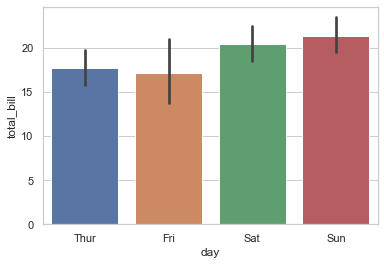

In [5]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

# 파일로 저장

In [ ]:


# 파일로 저장
df.to_csv('winequality_edited.csv', index=False)

# # 컬럼 제어


## 타입별 컬럼명 조회 , 타입 조회 , 타입 변경

In [ ]:
# 숫자 컬럼 조회  case 01 
# 숫자형 컬럼 조회
numeric_feats = df.dtypes[df.dtypes != "object"].index

# 숫자 컬럼 조회  case 02
numeric_feats = df.dtypes[df.dtypes != "number"].index


# Object 컬럼 조회  case 01
numeric_feats = df.dtypes[df.dtypes == "object"].index

# 카테고리컬 타입 조회
categorical_columns = list(df.select_dtypes(['category']).columns.append( df.select_dtypes(['object']).columns ) )


In [ ]:
# 카테고리 타입으로 변경
lst_obj_cols = df_tmp.dtypes[df_tmp.dtypes == "object"].index # obj 컬럼을 조회
for col_name in lst_obj_cols :
    df_tmp[col_name] = df_tmp[col_name].astype( "category" )    

In [ ]:
#(TODO) : 

# # DataFrame 에 데이터 추가

In [ ]:
df_성능튜닝기록 = pd.concat( [df_성능튜닝기록 , df_tmp ] , axis=0 )

In [ ]:
df_a = pd.DataFrame()
df_a = pd.concat ()


In [12]:
# 기존 데이터 프레임
df_temp = pd.DataFrame([['a',1],['b',2]], columns=['key', 'value'])


# 추가하고 싶은 Dict
ex = {'key': 'a', 'value':3}

# 행 추가
df_temp.append(ex, ignore_index=True)



# 열 추가
dict_a =  { "col1" : ["val1"] , "col2" : ["val3"] }
dict_a =  { "col1" : "val1" , "col2" : "val3" }
pd.concat ( [df_temp[0:1] , pd.DataFrame(dict_a) ] , axis= 1)


/var/folders/jn/rsqz7wy50rqf16w210vtbm1w0000gn/T/ipykernel_50999/2586676575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp.append(ex, ignore_index=True)


ValueError: If using all scalar values, you must pass an index

# # DataFrame 만들기

https://rfriend.tistory.com/482


In [ ]:

X = pd.DataFrame(   index = ['train', 'CV', 'Test'], 
                    data = {'OLS':[ols_train, ols_val, ols_test], 'Ridge':[ridge_train, ridge_val, ridge_test], 'Lasso':[lasso_train, lasso_val, lasso_test]}   )

X = pd.DataFrame( data=data , columns=columns )

X = pd.DataFrame( data=X )

X = pd.DataFrame( {'species':species , 'PC1':B[:,0] , 'PC2':B[:,1] } )

X = pd.DataFrame([  ['a',1],
                    ['b',2]
                ],
                columns=['key', 'value'])


X = d.DataFrame(
    index=['mse', 'rmse', 'mae', 'r2'], 
    columns=['Base','Simple', 'Multiple', 'Polynomial'])



# # 팁 , tip

In [ ]:
#(v) imputer의 결과를 DataFrame 형식으로 저장
# 컬럼명 살리기
df.loc[:,:] = imputer.fit_transform(df) #(v) imputer의 결과를 DataFrame 형식으로 저장

In [ ]:
# 인덱스를 역순으로 조회
df_tmp[::-1] 


# 수치형 데이터 간의 상관 관계 표 

/Users/lamune/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/lamune/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/lamune/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


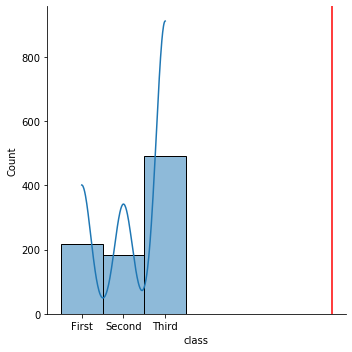

In [11]:
# 컬럼 데이터의 분포 확인

df_temp = df_titanic
target_col = 'class'
표시값 = 6

import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df_temp[target_col], kde=True)
plt.axvline( 표시값, color="red")

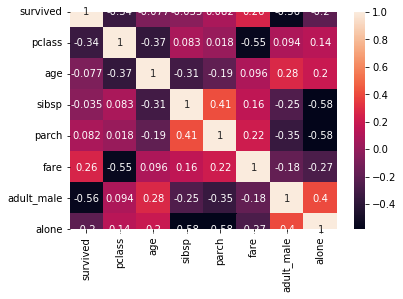

In [5]:
# 수치형 데이터 간의 correlation coefficient를 그래프 그리기
# 

df_temp = df_titanic

corr = df_temp.corr()  # 자동으로 수치형 데이터 간의 correlation coefficient를 계산해 줍니다.
sns.heatmap(corr, annot=True)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


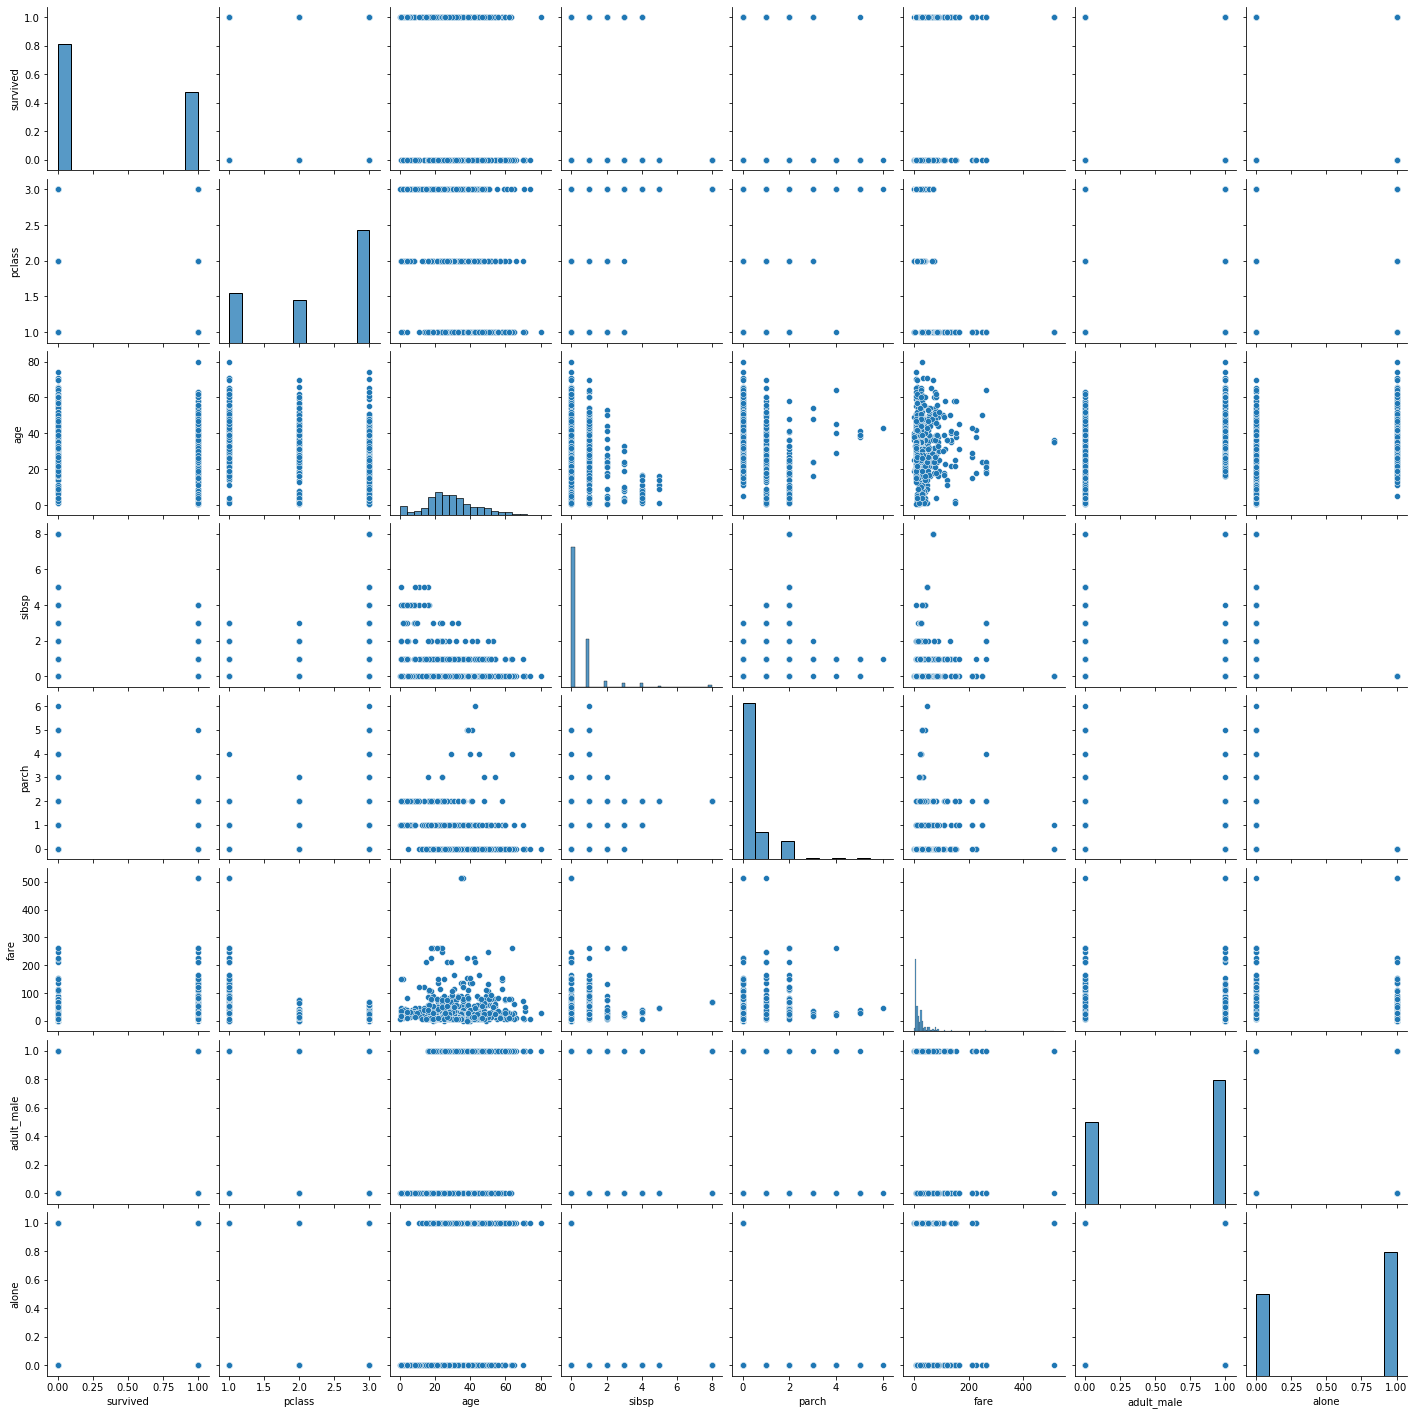

In [12]:
# 숫자형 컬럼간의 관계 시각화
lst_features = df_temp.columns # 전체 컬럼을 넣어 주어도 그중에서 숫자, bool  컬럼만 비교 한다. 
numeric_feats = df.dtypes[df.dtypes != "number"].index

sns.pairplot(df_temp[numeric_feats])

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


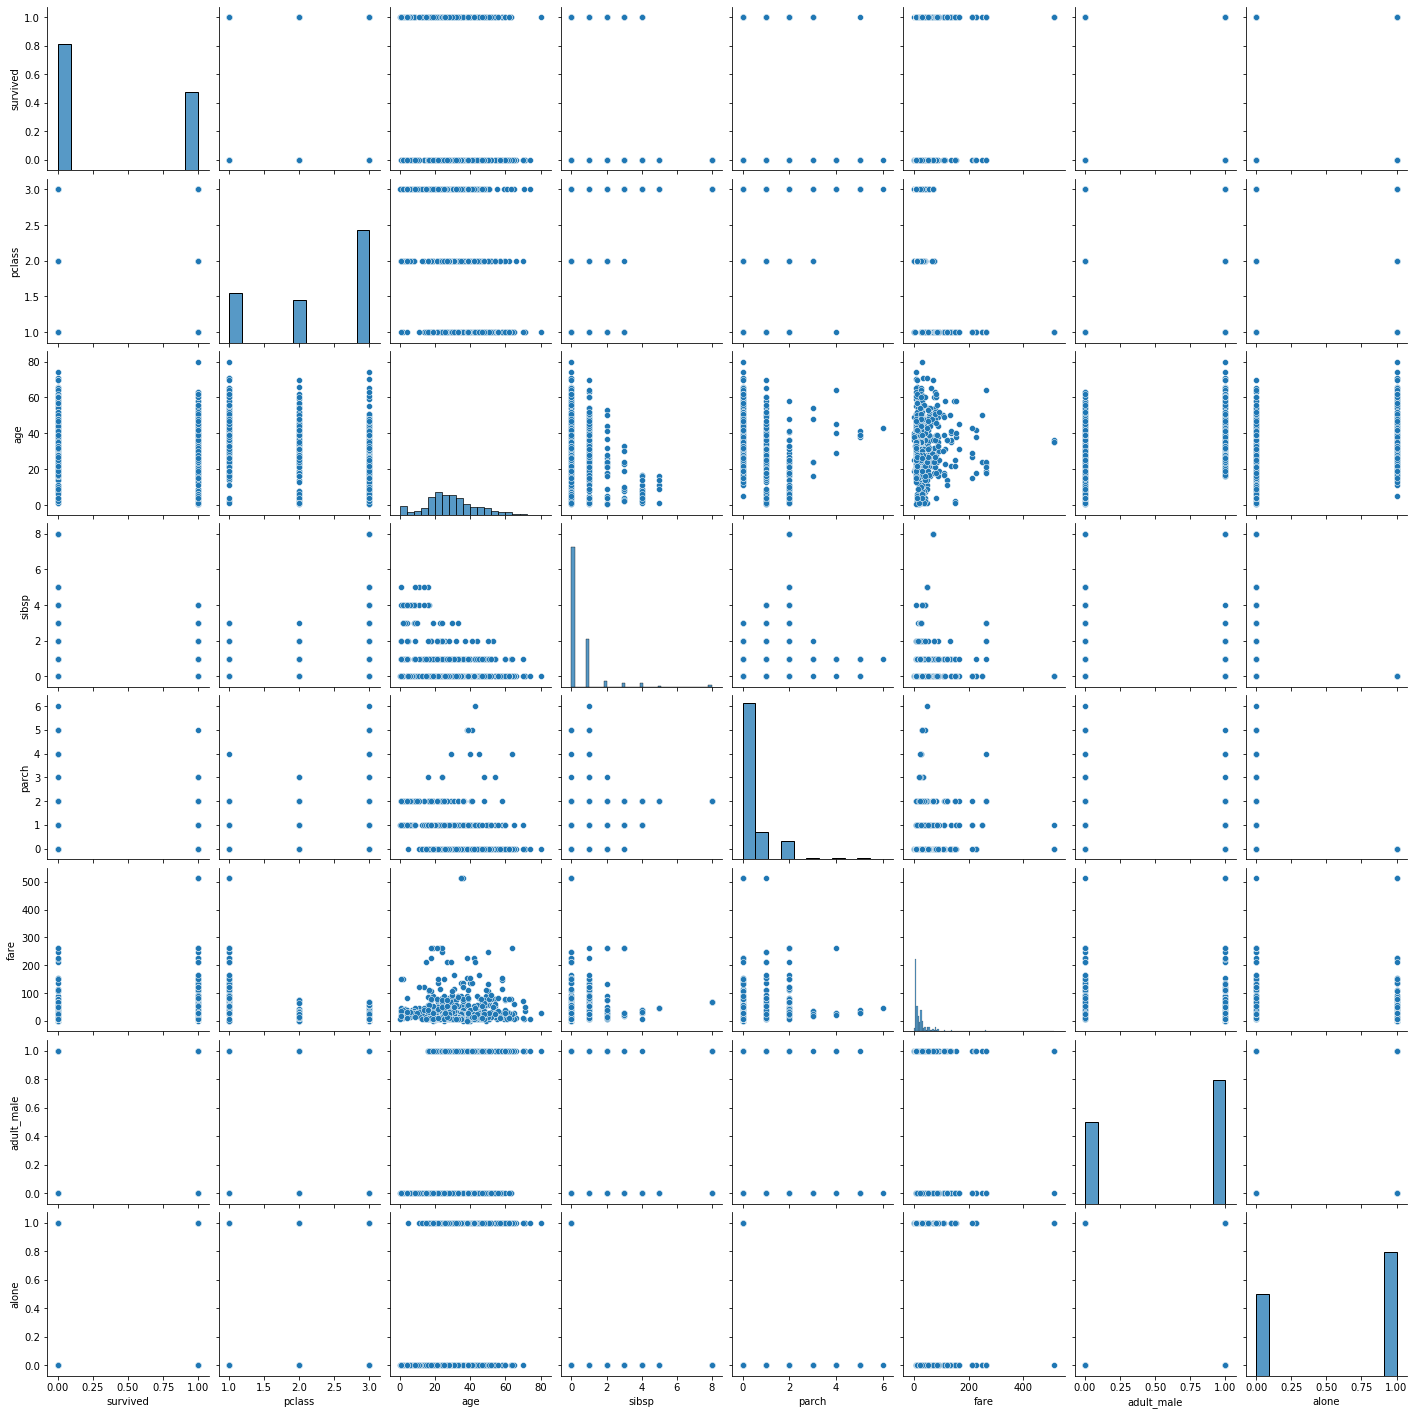

In [15]:
numeric_feats = df_temp.dtypes[df_temp.dtypes != "number"].index
sns.pairplot(df_temp[numeric_feats])

In [17]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
df_temp.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2018,Ford,Focus ST,Mid-size,2.0,4,M6,X,10.5,7.8,9.3,30,219,5,3
1,2018,Ford,Fusion,Mid-size,2.0,4,AS6,X,11.2,7.6,9.6,29,225,5,5
2,2018,Ford,Fusion,Mid-size,2.5,4,A6,X,11.3,7.4,9.5,30,223,5,5
3,2018,Ford,Fusion AWD,Mid-size,2.0,4,AS6,X,11.8,8.2,10.2,28,238,5,5
4,2018,Ford,Fusion AWD,Mid-size,2.7,6,AS6,X,13.8,9.1,11.8,24,277,4,5


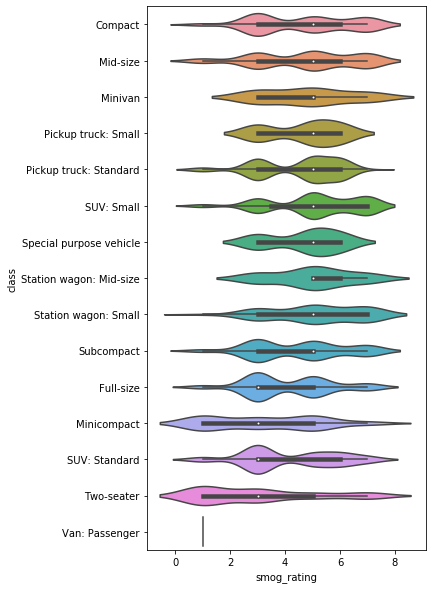

In [25]:
df_temp = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/fuel.csv")
df_temp.columns = ["year", "make", "model", "class", "esize", "n_cylinder", "ttype", "ftype", "fcons_cty", "fcons_hwy", "fcons_comp", "fcons_mpg", "co2_emsn", "co2_rating", "smog_rating", ]

grp_by_col = 'class'
target_col = 'smog_rating'


# class에 따른 smog_rating 값의 분포를 violinplot으로 확인합니다.
plt.figure(figsize=(5, 10))
sns.violinplot(
    x=target_col,
    y=grp_by_col,
    data=df_temp,
    order=list(
        df_temp.groupby(grp_by_col)
        .median()
        .sort_values(by=target_col, ascending=False)
        .index.values
    ),
    orient="h",
)